In [210]:
import pandas as pd 
from sklearn.feature_selection import VarianceThreshold
import sknetwork

## Data loading (Simple dataset)
We will load all needed dataset in our program.

In [211]:
users_features = pd.read_csv("data/Social_spammers_dataset/users_features/features.csv")
labels = pd.read_csv("data/Social_spammers_dataset/users/coded_ids_labels_train.csv")
code_ids_label = pd.read_csv("data/Social_spammers_dataset/users/coded_ids.csv")
users_features = pd.merge(users_features, code_ids_label, on='user_id')

In [212]:
users_features_with_labels = pd.merge(users_features, labels, on='coded_id')

## Data Loading (Graph dataset)

In [1]:
graph = pd.read_csv("/data/Social_spammers_dataset/graphs/c_combined_edges_w_1_s_0.9.csv")

## Data preprocessing

In [213]:
users_features_with_labels.shape

(686, 147)

In [214]:
users_features_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Columns: 147 entries, active_tweeting_frequency_per_day to label
dtypes: bool(2), float64(93), int64(44), object(8)
memory usage: 783.8+ KB


In [215]:
# total null values
users_features_with_labels.isna().sum().sum()

1022

In [216]:
users_features_with_labels['label'].isna().sum()

0

In [217]:
#all columns with null values
users_features_with_labels.isna().sum()


active_tweeting_frequency_per_day      0
adjusted_nb_of_uses_of_hashtag         0
adjusted_nb_of_uses_of_mention         0
adjusted_nb_of_uses_of_sources         0
adjusted_nb_of_uses_of_url             0
                                    ... 
urls_used_on_average                   0
user_id                                0
utc_offset                           168
coded_id                               0
label                                  0
Length: 147, dtype: int64

In [218]:
# column content null values
df1 = users_features_with_labels.iloc[0:0,]
columns = list(df1)
for col in columns :
    s = users_features_with_labels[col].isna().sum()
    if (s != 0):
        print (col)
        print(s)
    else:
        pass

spam_in_screen_name
686
time_zone
168
utc_offset
168


In [227]:
users_features_with_labels[['time_zone','utc_offset']].head(30)

time_zone  utc_offset  label
0                       Hawaii    -36000.0      0
1                       Riyadh     10800.0      0
2   Pacific Time (US & Canada)    -28800.0      1
3   Pacific Time (US & Canada)    -28800.0      1
4   Central Time (US & Canada)    -21600.0      1
5   Pacific Time (US & Canada)    -28800.0      1
6                       Riyadh     10800.0      0
7                          NaN         NaN      1
8                          NaN         NaN      0
9                       Riyadh     10800.0      0
10                         NaN         NaN      1
11                         NaN         NaN      1
12                         NaN         NaN      0
13                         NaN         NaN      0
14  Pacific Time (US & Canada)    -28800.0      0
15  Pacific Time (US & Canada)    -28800.0      1
16                         NaN         NaN      1
17                        Kyiv      7200.0      1
18                         NaN         NaN      1
19                         NaN         NaN      1
20                         NaN         NaN      0
21                   Greenland    -10800.0      0
22  Central Time (US & Canada)    -21600.0      1
23                         NaN         NaN      0
24                         NaN         NaN      0
25                         NaN         NaN      1
26                     Nairobi     10800.0      0
27                     Baghdad     10800.0      1
28                         NaN         NaN      1
29                      Riyadh     10800.0      0

In [230]:
#Frequent Category Imputation
#This technique is used to fill the missing values in categorical data. 
#In this, we replace NaN values with the most Frequent label. 
#First, we find the most frequent label and then replace NaN with it.

def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0] ##Most Frequent
    df[variable].fillna(most_frequent_category,inplace=True) 
for feature in ['time_zone']:           ##List of Categorical Features
    impute_nan(users_features_with_labels,feature)

for feature in ['utc_offset']:           ##List of Categorical Features
    impute_nan(users_features_with_labels,feature)

users_features_with_labels[['time_zone','utc_offset']].head(30)

time_zone  utc_offset
0                       Hawaii    -36000.0
1                       Riyadh     10800.0
2   Pacific Time (US & Canada)    -28800.0
3   Pacific Time (US & Canada)    -28800.0
4   Central Time (US & Canada)    -21600.0
5   Pacific Time (US & Canada)    -28800.0
6                       Riyadh     10800.0
7   Eastern Time (US & Canada)    -14400.0
8   Eastern Time (US & Canada)    -14400.0
9                       Riyadh     10800.0
10  Eastern Time (US & Canada)    -14400.0
11  Eastern Time (US & Canada)    -14400.0
12  Eastern Time (US & Canada)    -14400.0
13  Eastern Time (US & Canada)    -14400.0
14  Pacific Time (US & Canada)    -28800.0
15  Pacific Time (US & Canada)    -28800.0
16  Eastern Time (US & Canada)    -14400.0
17                        Kyiv      7200.0
18  Eastern Time (US & Canada)    -14400.0
19  Eastern Time (US & Canada)    -14400.0
20  Eastern Time (US & Canada)    -14400.0
21                   Greenland    -10800.0
22  Central Time (US & Canada)    -21600.0
23  Eastern Time (US & Canada)    -14400.0
24  Eastern Time (US & Canada)    -14400.0
25  Eastern Time (US & Canada)    -14400.0
26                     Nairobi     10800.0
27                     Baghdad     10800.0
28  Eastern Time (US & Canada)    -14400.0
29                      Riyadh     10800.0

In [224]:
## all values of column spam_in_screen_name are null
users_features_with_labels['spam_in_screen_name'] 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
681   NaN
682   NaN
683   NaN
684   NaN
685   NaN
Name: spam_in_screen_name, Length: 686, dtype: float64

In [232]:
#so we can delete this column spam_in_screen_name
users = users_features_with_labels.drop(['spam_in_screen_name'], axis=1)


0                          Hawaii
1                          Riyadh
2      Pacific Time (US & Canada)
3      Pacific Time (US & Canada)
4      Central Time (US & Canada)
                  ...            
681                         Seoul
682    Eastern Time (US & Canada)
683                         Tokyo
684                        London
685                     Amsterdam
Name: time_zone, Length: 686, dtype: object

In [233]:
columns

['active_tweeting_frequency_per_day',
 'adjusted_nb_of_uses_of_hashtag',
 'adjusted_nb_of_uses_of_mention',
 'adjusted_nb_of_uses_of_sources',
 'adjusted_nb_of_uses_of_url',
 'age',
 'avg_intertweet_times',
 'avg_intertweet_times_seconds',
 'content_duration_days',
 'date_newest_tweet',
 'date_oldest_tweet',
 'default_profile',
 'default_profile_image',
 'diversity_index_of_hashtags',
 'diversity_index_of_mentions',
 'diversity_index_of_sources',
 'diversity_index_of_urls',
 'favourites_count',
 'followees_per_followers_sq',
 'followers_count',
 'followers_count_minus_2002',
 'followers_per_followees',
 'friends_count',
 'friends_count_minus_2002',
 'hashtags_used_on_average',
 'lang',
 'len_description',
 'len_screen_name',
 'max_intertweet_times',
 'max_intertweet_times_seconds',
 'max_nb_characters_per_tweet',
 'max_nb_favourites_per_tweet',
 'max_nb_hashtags_per_tweet',
 'max_nb_hashtags_per_word_in_the_tweet',
 'max_nb_mentions_per_tweet',
 'max_nb_mentions_per_word_in_the_tweet',

In [234]:
# column content null values
df1 = users.iloc[0:0,]
columns = list(df1)
for col in columns :
    s = users[col].isna().sum()
    if (s != 0):
        print (col)
        print(s)
    else:
        pass

## Exploration of data

In [208]:
users_features_with_labels.head()

active_tweeting_frequency_per_day  adjusted_nb_of_uses_of_hashtag  \
0                              0.055                           2.600   
1                             40.000                           9.938   
2                              0.334                           2.600   
3                              4.494                           0.000   
4                             80.000                         395.000   

   adjusted_nb_of_uses_of_mention  adjusted_nb_of_uses_of_sources  \
0                           5.308                          21.087   
1                           8.329                         400.000   
2                           2.412                          55.284   
3                           0.000                         203.380   
4                           0.000                         400.000   

   adjusted_nb_of_uses_of_url   age        avg_intertweet_times  \
0                       2.333  2186  19 days 05:12:37.409091000   
1                       1.000  2474   0 days 00:39:20.897243000   
2                      36.885  3220  16 days 16:04:30.509317000   
3                       1.000   816   0 days 05:24:08.857143000   
4                     174.673  1174   0 days 00:19:59.997494000   

   avg_intertweet_times_seconds  content_duration_days    date_newest_tweet  \
0                     1660357.0                    422  26/12/2017 14:45:25   
1                        2361.0                     10  10/02/2018 17:00:37   
2                     1440271.0                    485  04/07/2011 03:37:09   
3                       19449.0                     89  09/02/2018 12:43:09   
4                        1200.0                      5  10/02/2018 17:15:00   

   ...                   time_zone  tweeting_frequency_per_day  \
0  ...                      Hawaii                       5.396   
1  ...                      Riyadh                      35.167   
2  ...  Pacific Time (US & Canada)                       0.051   
3  ...  Pacific Time (US & Canada)                      23.863   
4  ...  Central Time (US & Canada)                      46.056   

   tweets_with_at_top_20  tweets_with_hashtags_top_20  \
0                     10                            5   
1                     19                            2   
2                      0                            0   
3                      0                            0   
4                      0                           19   

   tweets_with_urls_top_20  urls_used_on_average     user_id  utc_offset  \
0                        5                 2.000   494199648    -36000.0   
1                        1                 1.000   293270197     10800.0   
2                       20                 2.400    33046208    -28800.0   
3                       20                 1.000  4217668515    -28800.0   
4                       20                 1.908  2909542704    -21600.0   

   coded_id  label  
0       203      0  
1       138      0  
2       148      1  
3       182      1  
4       135      1  

[5 rows x 147 columns]

<AxesSubplot:xlabel='label', ylabel='count'>

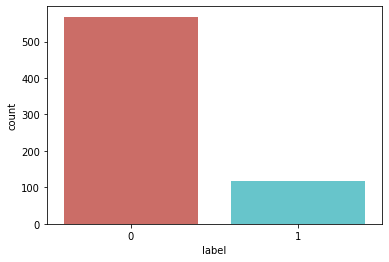

In [12]:
import seaborn as sb  
%matplotlib inline  
sb.countplot(x='label', data = users_features_with_labels, palette = 'hls')

In [ ]:
VarianceThreshold(threshold=(.8 * (1 - .8)))

## Feature Selection

## Data Analysis part

##  Models

## Evaluation of models